# CS 422 Section 01
<p>Department of Computer Science</p>
<p>Illinois Institute of Technology</p>
<p>Jithin Joyson</p>
<p>Spring 2019: Homework 3</p>

## Part 2.1

In [2]:
library('dplyr')
setwd(getwd())
buddymove <- read.csv("buddymove_holidayiq.csv", sep = ",", header = T, row.names = 1)

In [3]:
head(buddymove)

,Sports,Religious,Nature,Theatre,Shopping,Picnic
User 1,2,77,79,69,68,95
User 2,2,62,76,76,69,68
User 3,2,50,97,87,50,75
User 4,2,68,77,95,76,61
User 5,2,98,54,59,95,86
User 6,3,52,109,93,52,76


In [4]:
summary(buddymove)

     Sports        Religious         Nature         Theatre     
 Min.   : 2.00   Min.   : 50.0   Min.   : 52.0   Min.   : 59.0  
 1st Qu.: 6.00   1st Qu.: 84.0   1st Qu.: 89.0   1st Qu.: 93.0  
 Median :12.00   Median :104.0   Median :119.0   Median :113.0  
 Mean   :11.99   Mean   :109.8   Mean   :124.5   Mean   :116.4  
 3rd Qu.:18.00   3rd Qu.:132.0   3rd Qu.:153.0   3rd Qu.:138.0  
 Max.   :25.00   Max.   :203.0   Max.   :318.0   Max.   :213.0  
    Shopping         Picnic     
 Min.   : 50.0   Min.   : 61.0  
 1st Qu.: 79.0   1st Qu.: 92.0  
 Median :104.0   Median :119.0  
 Mean   :112.6   Mean   :120.4  
 3rd Qu.:138.0   3rd Qu.:143.0  
 Max.   :233.0   Max.   :218.0  

In [5]:
print('Feature Scaling: Z-score (to standardize Sports)')
buddymove.transformed <- scale(buddymove)
head(buddymove.transformed)

[1] "Feature Scaling: Z-score (to standardize Sports)"


,Sports,Religious,Nature,Theatre,Shopping,Picnic
User 1,-1.509552,-1.0100142,-0.9973422,-1.4744331,-1.0740003,-0.7783943
User 2,-1.509552,-1.4722052,-1.0630749,-1.2565864,-1.0499404,-1.6057691
User 3,-1.509552,-1.8419580,-0.6029459,-0.9142560,-1.5070790,-1.3912645
User 4,-1.509552,-1.2873288,-1.0411640,-0.6652884,-0.8815209,-1.8202736
User 5,-1.509552,-0.3629468,-1.5451149,-1.7856426,-0.4243823,-1.0541859
User 6,-1.358415,-1.7803325,-0.3400150,-0.7275303,-1.4589591,-1.3606210


### Part 2.1-A

In [7]:
library(cluster)
library(factoextra)

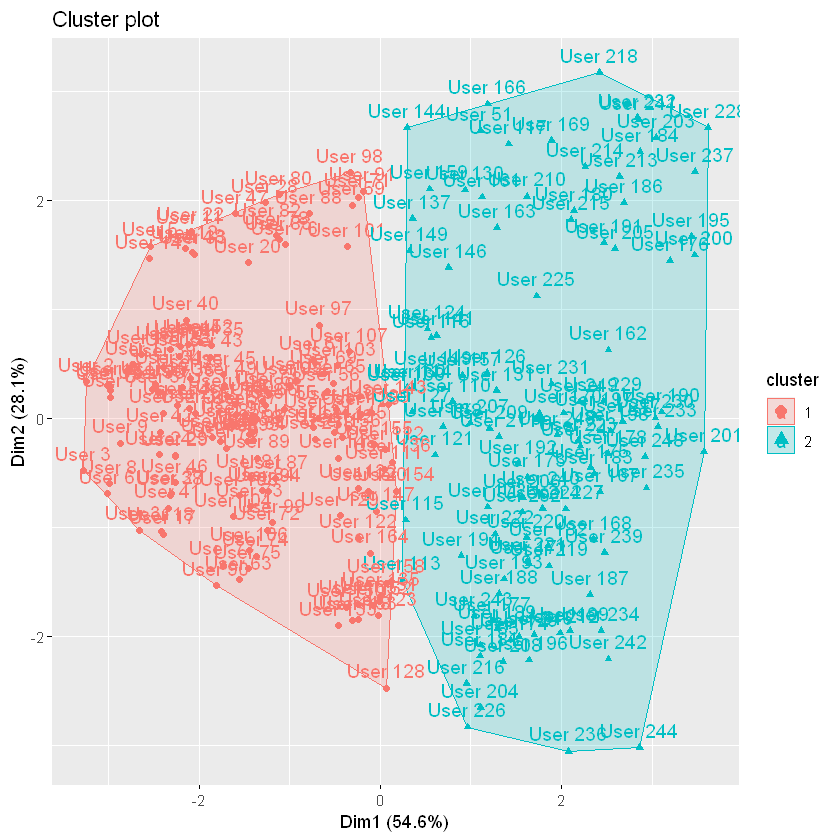

In [8]:
fviz_cluster(kmeans(buddymove.transformed, centers=2, nstart=1000), data=buddymove.transformed)

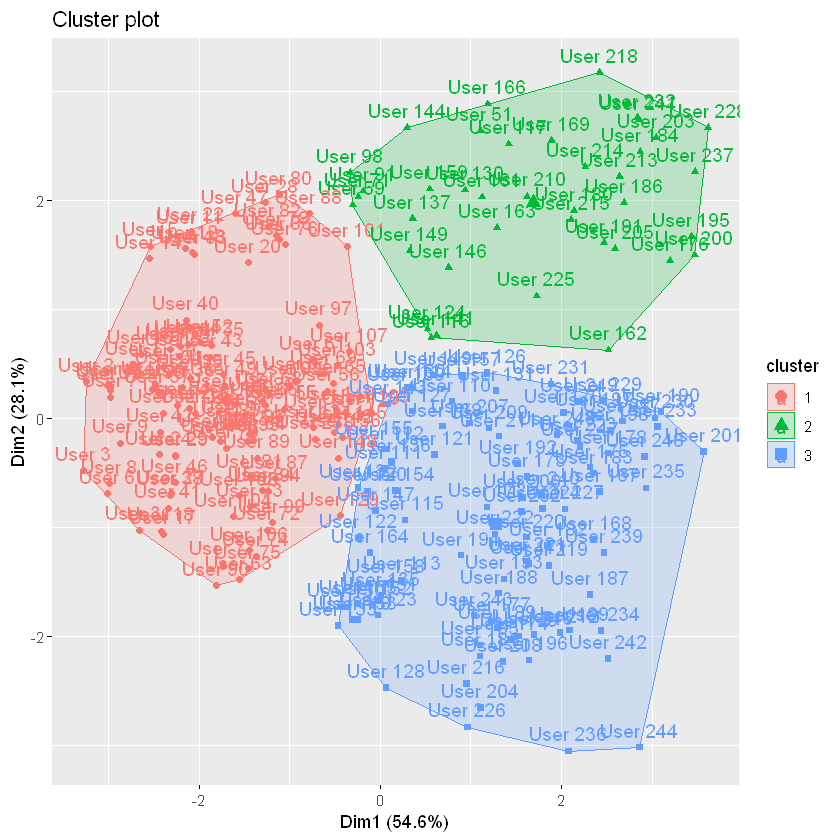

In [9]:
fviz_cluster(kmeans(buddymove.transformed, centers=3, nstart=1000), data=buddymove.transformed)

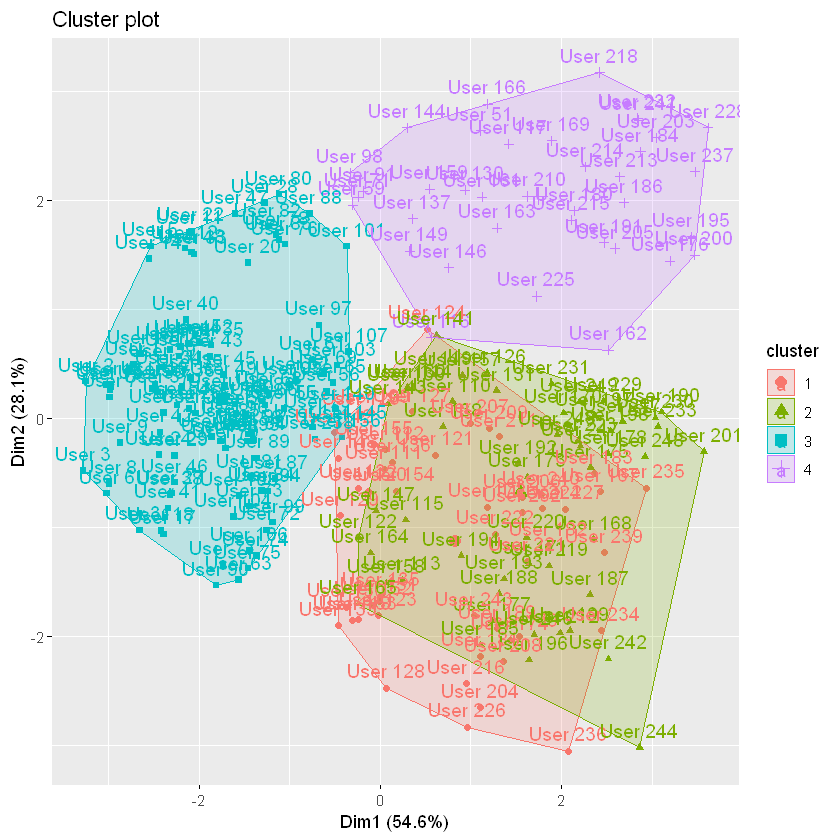

In [10]:
fviz_cluster(kmeans(buddymove.transformed, centers=4, nstart=1000), data=buddymove.transformed)

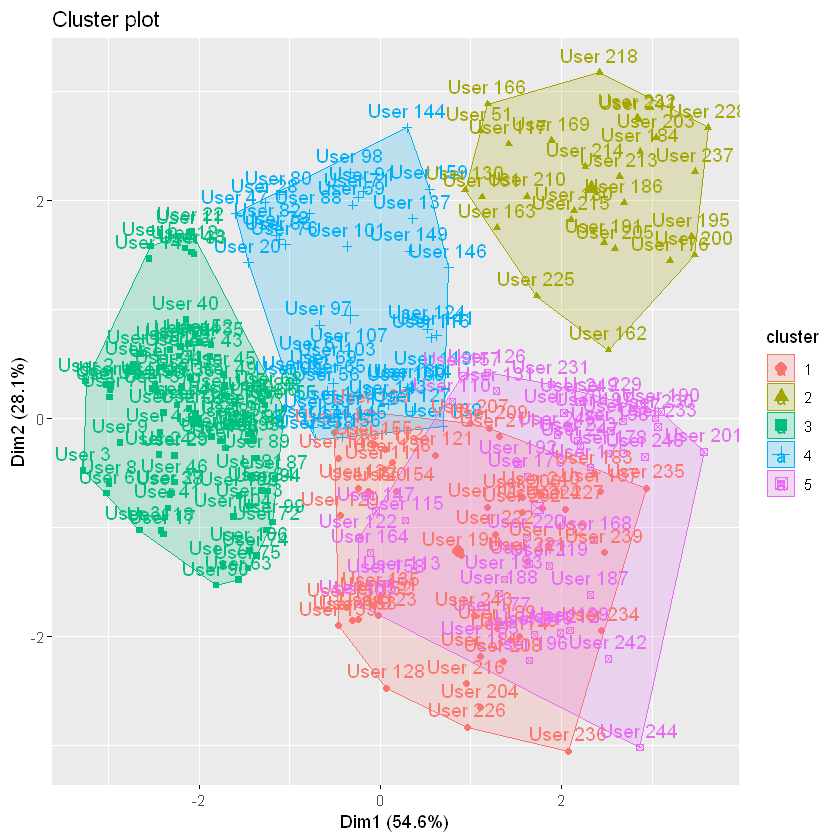

In [11]:
fviz_cluster(kmeans(buddymove.transformed, centers=5, nstart=1000), data=buddymove.transformed)

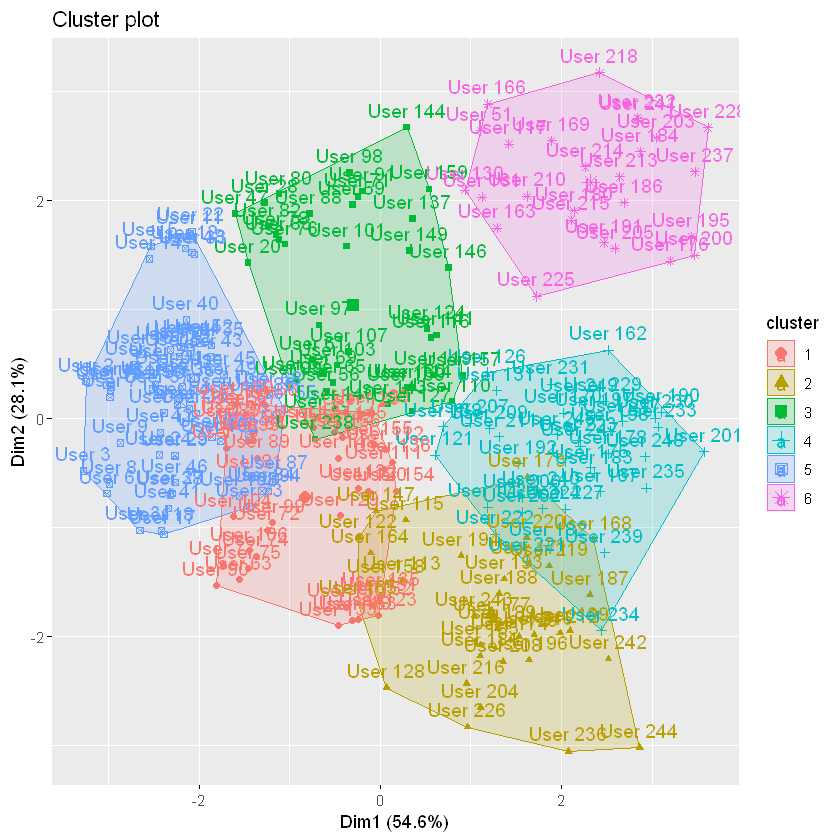

In [12]:
fviz_cluster(kmeans(buddymove.transformed, centers=6, nstart=1000), data=buddymove.transformed)

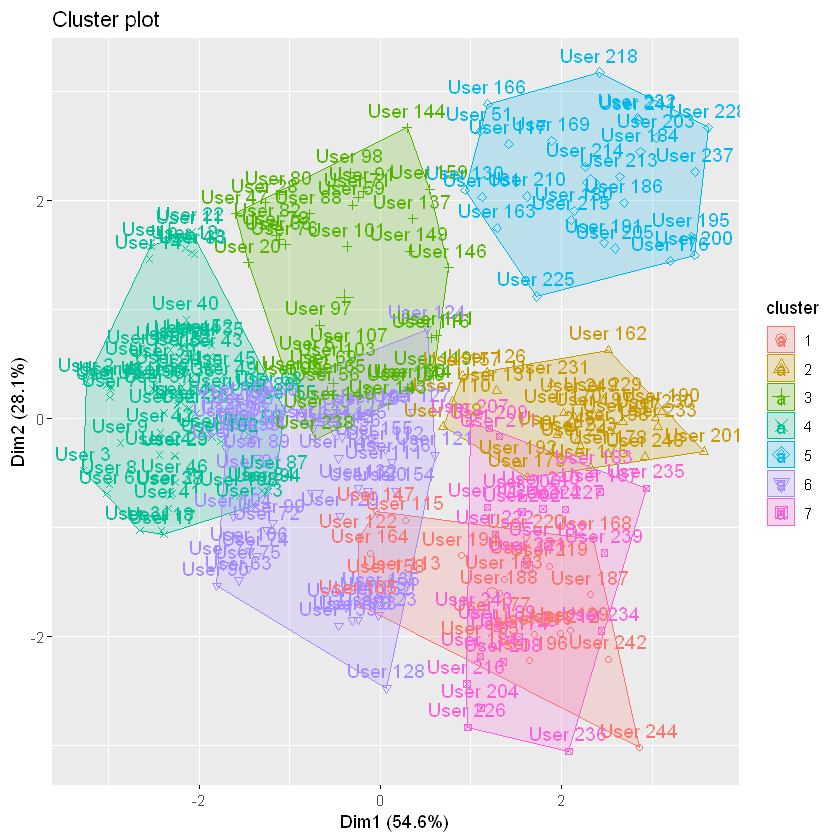

In [13]:
fviz_cluster(kmeans(buddymove.transformed, centers=7, nstart=1000), data=buddymove.transformed)

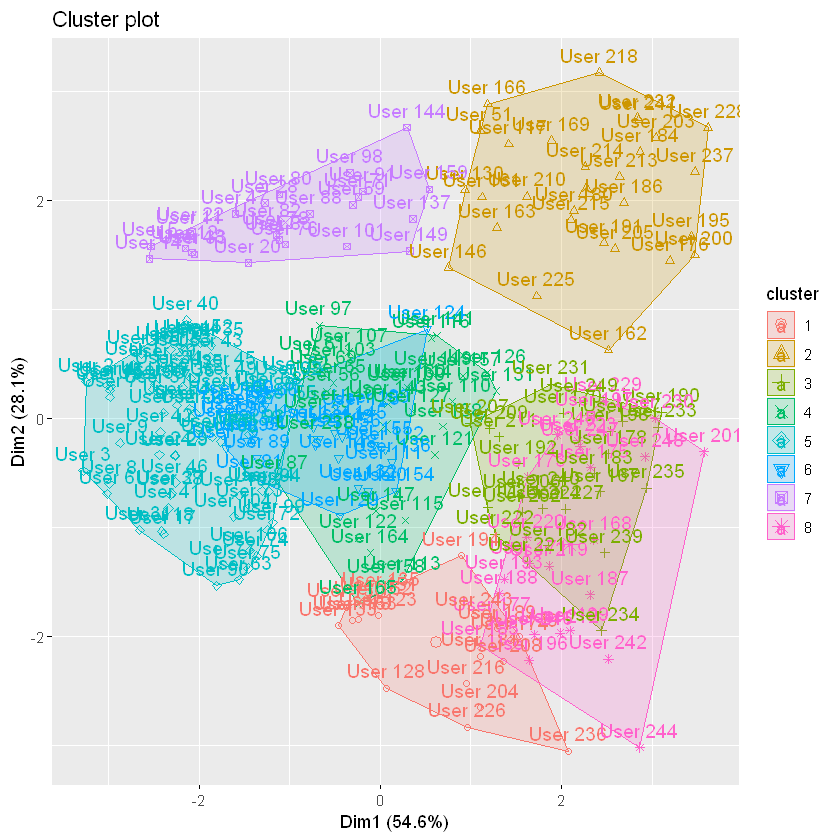

In [14]:
fviz_cluster(kmeans(buddymove.transformed, centers=8, nstart=1000), data=buddymove.transformed)

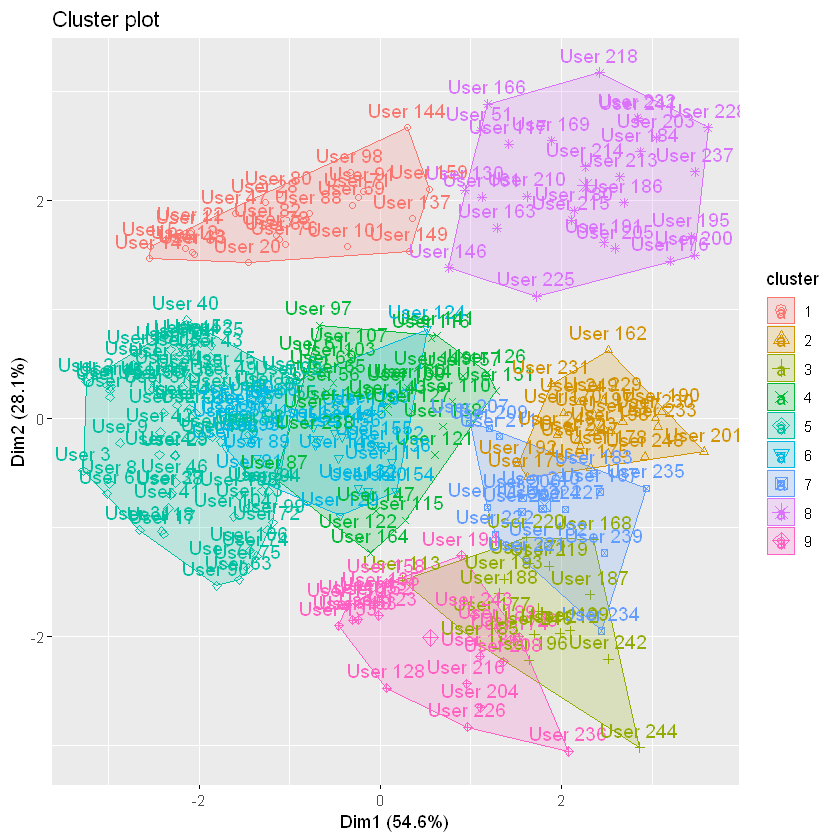

In [15]:
fviz_cluster(kmeans(buddymove.transformed, centers=9, nstart=1000), data=buddymove.transformed)

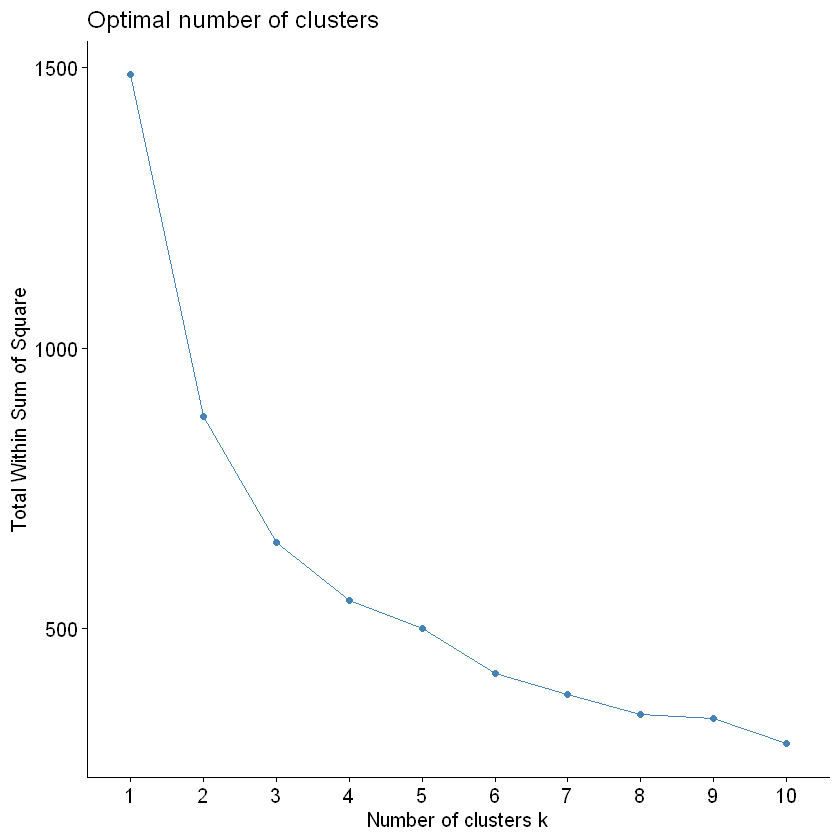

In [16]:
fviz_nbclust(buddymove.transformed, kmeans, method="wss")

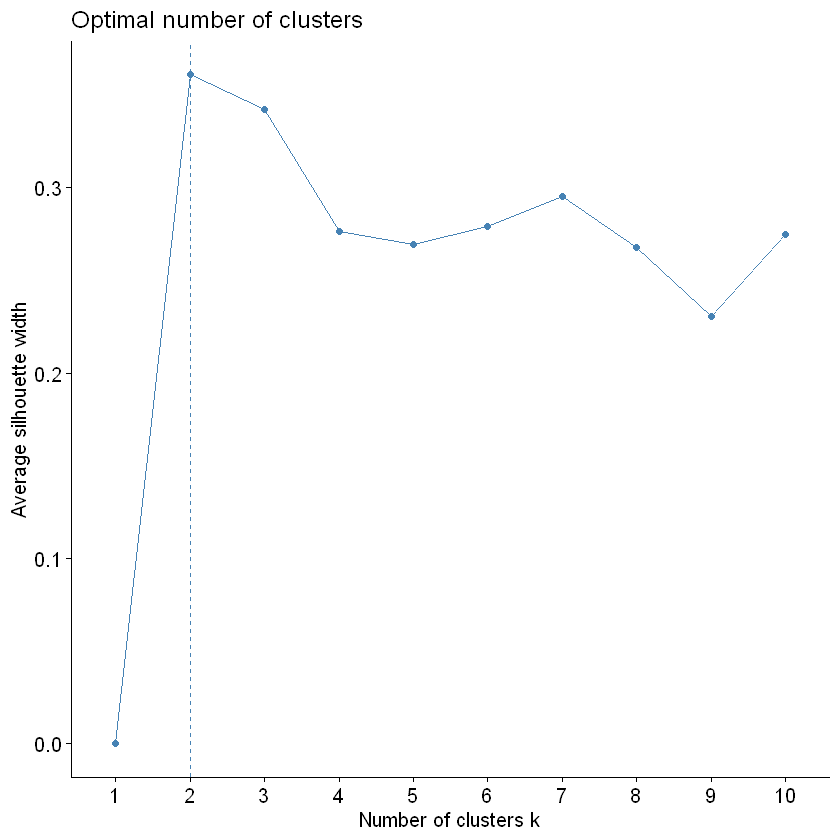

In [17]:
fviz_nbclust(buddymove.transformed, kmeans, method="silhouette")

After Looking at the cluster plots, cluters = 3 was chosen since it created the best cut-offs for clustering. The optimal number of clusters plot (wss) also point towards 3 being the point where SSE starts to dropping. Even though (silhouette) plot points at 2 clusters, 3 clusters show seperation without overlap with more clusters (something that occured in the iris dataset)

### Part 2.1-B

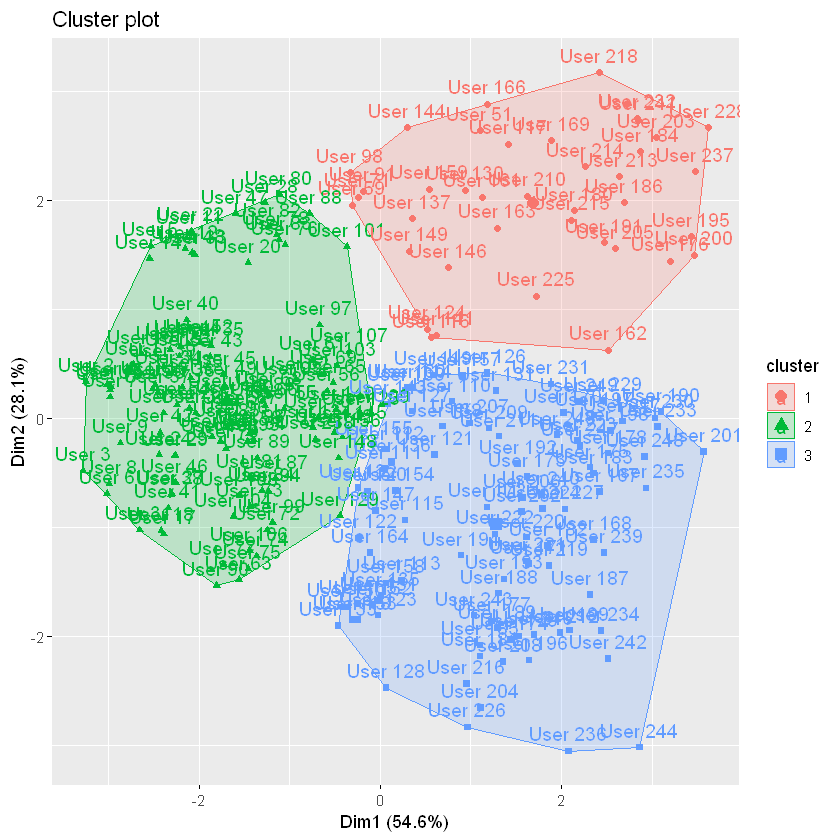

In [18]:
k <- kmeans(buddymove.transformed, centers=3, nstart=1000)
fviz_cluster(k, data=buddymove.transformed)

### Part 2.1-C

In [20]:
k$size

[1]  39 113  97

### Part 2.1-D

In [21]:
k$tot.withinss

[1] 649.9424

### Part 2.1-E

In [22]:
k$withinss

[1]  96.53409 222.64518 330.76311

### Part 2.1-F

In [23]:
cluster1 <- buddymove[which(k$cluster == 1),]
cluster2 <- buddymove[which(k$cluster == 2),]
cluster3 <- buddymove[which(k$cluster == 3),]

In [24]:
summary(cluster1)

     Sports        Religious         Nature          Theatre     
 Min.   : 6.00   Min.   :123.0   Min.   : 59.00   Min.   : 74.0  
 1st Qu.:12.00   1st Qu.:145.5   1st Qu.: 71.50   1st Qu.: 94.0  
 Median :18.00   Median :163.0   Median : 84.00   Median :109.0  
 Mean   :15.92   Mean   :162.0   Mean   : 86.56   Mean   :110.5  
 3rd Qu.:20.00   3rd Qu.:178.0   3rd Qu.: 96.00   3rd Qu.:119.0  
 Max.   :25.00   Max.   :203.0   Max.   :163.00   Max.   :164.0  
    Shopping         Picnic     
 Min.   :129.0   Min.   : 92.0  
 1st Qu.:163.0   1st Qu.:128.0  
 Median :188.0   Median :138.0  
 Mean   :182.0   Mean   :138.7  
 3rd Qu.:200.5   3rd Qu.:155.5  
 Max.   :233.0   Max.   :188.0  

In [25]:
summary(cluster2)

     Sports        Religious          Nature         Theatre     
 Min.   : 2.00   Min.   : 50.00   Min.   : 52.0   Min.   : 59.0  
 1st Qu.: 4.00   1st Qu.: 74.00   1st Qu.: 82.0   1st Qu.: 79.0  
 Median : 6.00   Median : 88.00   Median :103.0   Median : 94.0  
 Mean   : 5.92   Mean   : 88.41   Mean   :101.3   Mean   : 98.1  
 3rd Qu.: 8.00   3rd Qu.:100.00   3rd Qu.:123.0   3rd Qu.:113.0  
 Max.   :12.00   Max.   :133.00   Max.   :155.0   Max.   :168.0  
    Shopping          Picnic      
 Min.   : 50.00   Min.   : 61.00  
 1st Qu.: 69.00   1st Qu.: 81.00  
 Median : 84.00   Median : 92.00  
 Mean   : 87.03   Mean   : 94.63  
 3rd Qu.:102.00   3rd Qu.:102.00  
 Max.   :148.00   Max.   :148.00  

In [26]:
summary(cluster3)

     Sports        Religious         Nature         Theatre       Shopping    
 Min.   :10.00   Min.   : 74.0   Min.   : 94.0   Min.   : 89   Min.   : 69.0  
 1st Qu.:14.00   1st Qu.: 94.0   1st Qu.:139.0   1st Qu.:114   1st Qu.: 89.0  
 Median :18.00   Median :114.0   Median :163.0   Median :139   Median :114.0  
 Mean   :17.47   Mean   :113.7   Mean   :166.8   Mean   :140   Mean   :114.6  
 3rd Qu.:20.00   3rd Qu.:129.0   3rd Qu.:188.0   3rd Qu.:163   3rd Qu.:134.0  
 Max.   :25.00   Max.   :158.0   Max.   :318.0   Max.   :213   Max.   :183.0  
     Picnic     
 Min.   : 89.0  
 1st Qu.:124.0  
 Median :140.0  
 Mean   :143.1  
 3rd Qu.:158.0  
 Max.   :218.0  

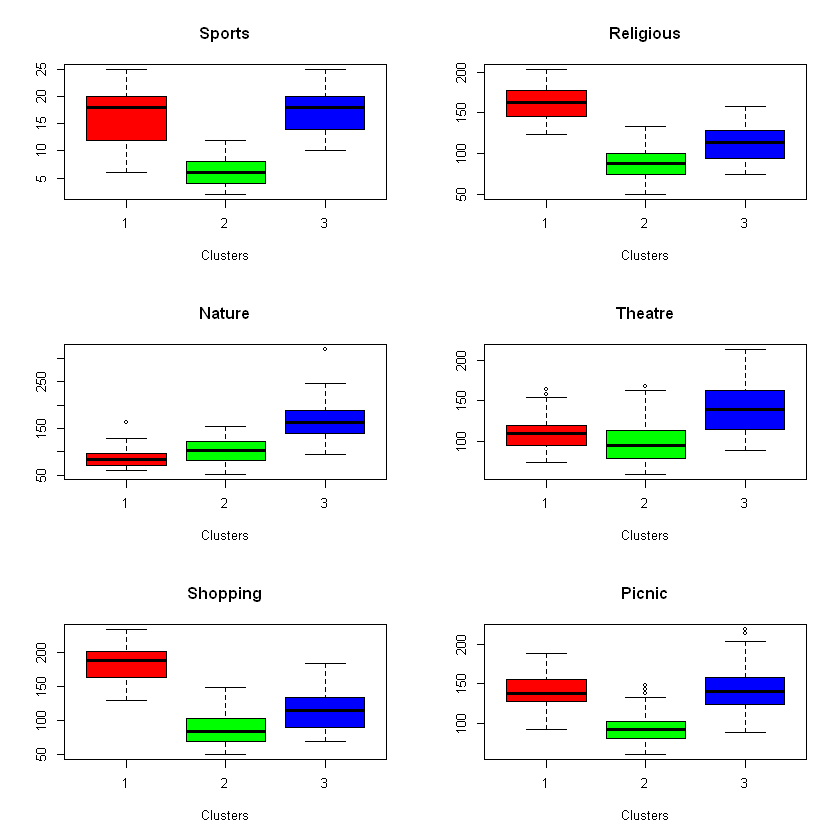

In [27]:
par(mfrow=c(3,2))
boxplot(cluster1$Sports,cluster2$Sports,cluster3$Sports, main = "Sports", names = c('1','2','3'), col = c('red','green','blue'), xlab = "Clusters")
boxplot(cluster1$Religious,cluster2$Religious,cluster3$Religious, main = "Religious", names = c('1','2','3'), col = c('red','green','blue'), xlab = "Clusters")
boxplot(cluster1$Nature,cluster2$Nature,cluster3$Nature, main = "Nature", names = c('1','2','3'), col = c('red','green','blue'), xlab = "Clusters")
boxplot(cluster1$Theatre,cluster2$Theatre,cluster3$Theatre, main = "Theatre", names = c('1','2','3'), col = c('red','green','blue'), xlab = "Clusters")
boxplot(cluster1$Shopping,cluster2$Shopping,cluster3$Shopping, main = "Shopping", names = c('1','2','3'), col = c('red','green','blue'), xlab = "Clusters")
boxplot(cluster1$Picnic,cluster2$Picnic,cluster3$Picnic, main = "Picnic", names = c('1','2','3'), col = c('red','green','blue'), xlab = "Clusters")

Looking at the different users in the clusters and the boxplots, it is evident that:
1. Cluster 3: Users who are highly interested in Sports, Theatre, Picnic and Nature and medium interest in Shopping and Religion
2. Cluster 2: Users who have a medium interest in Nature and low interest in Sports, Theatre, Picnic, Shopping and Religion
3. Cluster 1: Users who are highly interested in Sports, Religion, and Shopping, medium interest in Theatre and Picnic and low interest in Nature

In [28]:
cluster1.trans <- buddymove.transformed[which(k$cluster == 1),]
cluster2.trans <- buddymove.transformed[which(k$cluster == 2),]
cluster3.trans <- buddymove.transformed[which(k$cluster == 3),]

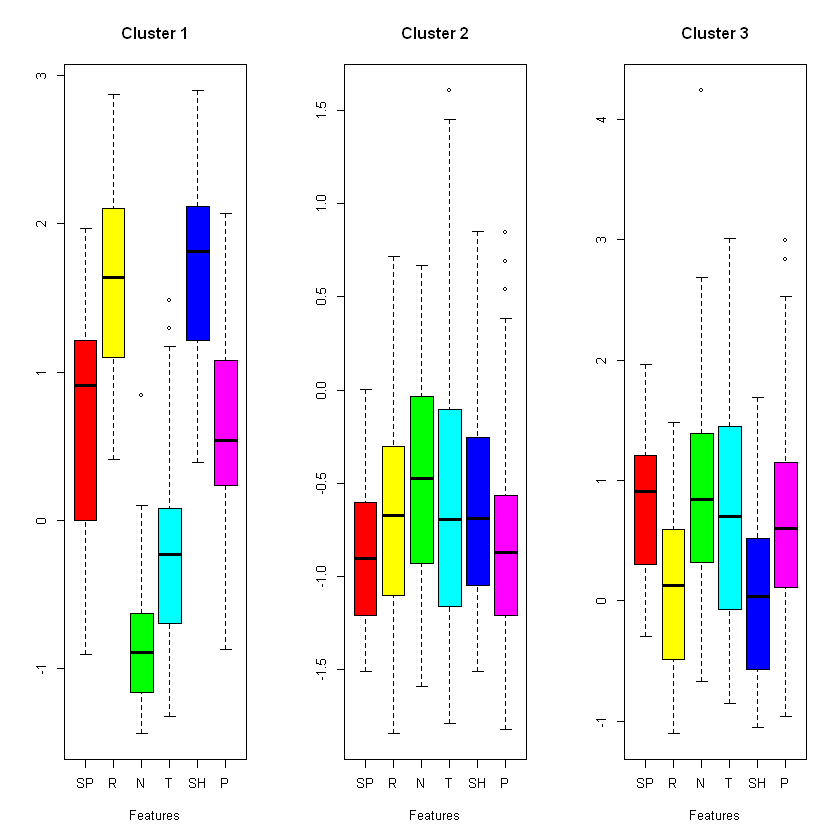

In [29]:
par(mfrow=c(1,3))
boxplot(cluster1.trans, main = "Cluster 1", names = c('SP','R','N','T','SH','P'), col = rainbow(6), xlab = "Features")
boxplot(cluster2.trans, main = "Cluster 2", names = c('SP','R','N','T','SH','P'),col = rainbow(6), xlab = "Features")
boxplot(cluster3.trans, main = "Cluster 3", names = c('SP','R','N','T','SH','P'),col = rainbow(6), xlab = "Features")

Looking at the different users in the clusters and the boxplots, it is evident that:
1. Sports and Picnic Interest are positively correlated within clusters
2. Religious and Shopping Interest are positively correlated within clusters
3. Sports and Shopping Interest are negatively correlated within clusters 1 & 2 but negatively correlated in cluster 3
4. Religious and Picnic Interest are negatively correlated within clusters 1 & 2 but negatively correlated in cluster 3
5. Nature and Theatre are positively correlated in clusters 2 & 3 but negatively correlated in cluster 1

As a Domain Expert:

This does make sense since:

Cluster 3 holds individuals who are students or lower age group that spend a lot of time watching/playing sports, being parts of theatre, taking part in picnics (high correlation with nature) while don't care about shopping or religion

Cluster 2 holds individuals who are higher age group that spend less time watching/playing sports, being parts of theatre, taking part in picnics (high correlation with nature), shopping and regious activities

Cluster 1 are individuals who are interested in shopping, sports and religious which might be people who are into sports fashion (this cluster is the most disfunctional) 

## Part 2.2

In [32]:
head(buddymove.transformed)

,Sports,Religious,Nature,Theatre,Shopping,Picnic
User 1,-1.509552,-1.0100142,-0.9973422,-1.4744331,-1.0740003,-0.7783943
User 2,-1.509552,-1.4722052,-1.0630749,-1.2565864,-1.0499404,-1.6057691
User 3,-1.509552,-1.8419580,-0.6029459,-0.9142560,-1.5070790,-1.3912645
User 4,-1.509552,-1.2873288,-1.0411640,-0.6652884,-0.8815209,-1.8202736
User 5,-1.509552,-0.3629468,-1.5451149,-1.7856426,-0.4243823,-1.0541859
User 6,-1.358415,-1.7803325,-0.3400150,-0.7275303,-1.4589591,-1.3606210


In [33]:
set.seed(1122)
indx <- sample(1:nrow(buddymove.transformed), 50)
data <- buddymove.transformed[indx,]
head(data)

,Sports,Religious,Nature,Theatre,Shopping,Picnic
User 20,-1.056140132,0.1300570,-0.9096986,-1.59891689,0.03275628,-0.5638898
User 4,-1.509552016,-1.2873288,-1.0411640,-0.66528841,-0.88152089,-1.8202736
User 167,1.513193879,0.5614352,0.7336194,2.07335514,1.09139302,0.2941285
User 36,-1.207277427,-0.9483887,-0.8439659,-0.19847417,-0.47250216,-1.4525515
User 116,0.001820931,0.7154989,-0.4495696,0.08161438,0.39365517,0.3860590
User 115,0.304095521,-0.4861977,0.8431739,-0.54080461,-0.44844223,0.9989291


### Part 2.2-A

In [34]:
sing_hclust <- eclust(data, "hclust", k = 1, hc_method="single")
comp_hclust <- eclust(data, "hclust", k = 1, hc_method="complete")
aver_hclust <- eclust(data, "hclust", k = 1, hc_method="average")

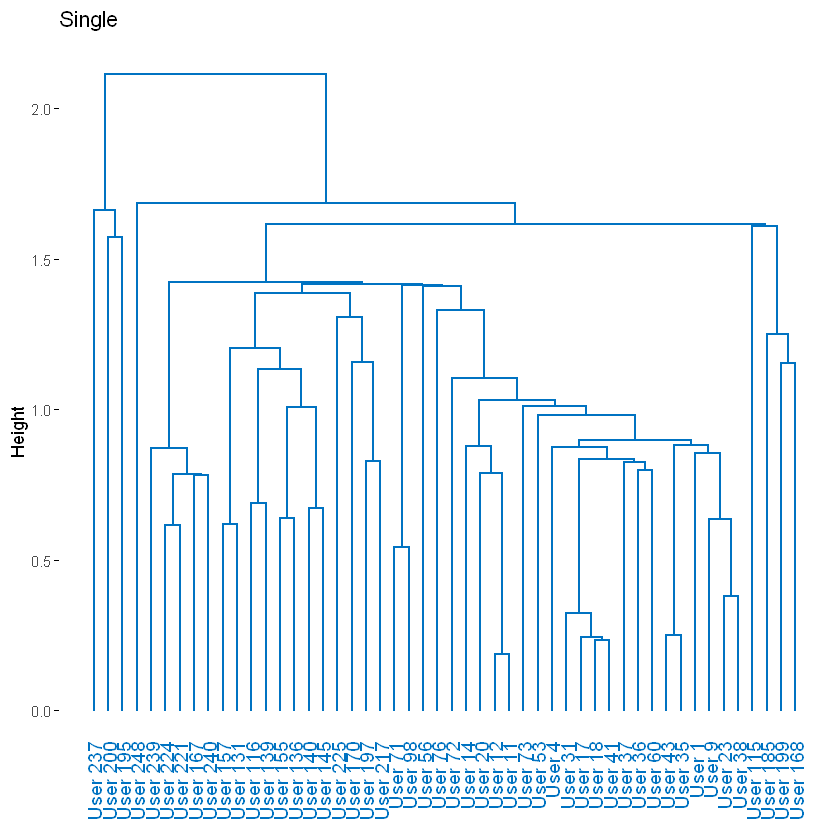

In [35]:
fviz_dend(sing_hclust, palette="jco", as.ggplot=T, main = "Single")

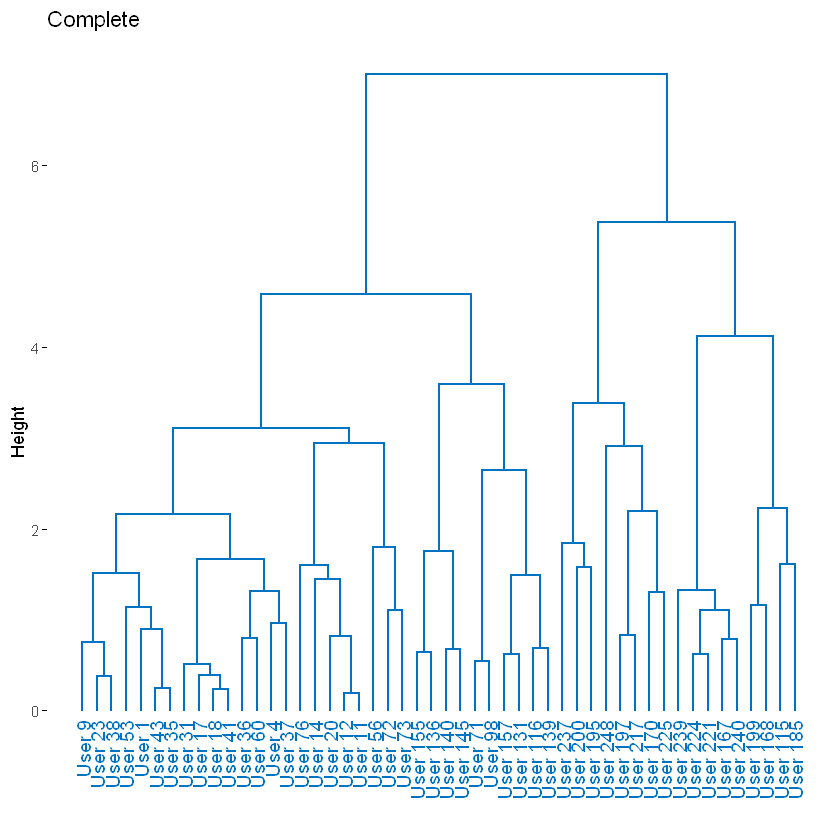

In [36]:
fviz_dend(comp_hclust, palette="jco", as.ggplot=T, main = "Complete")

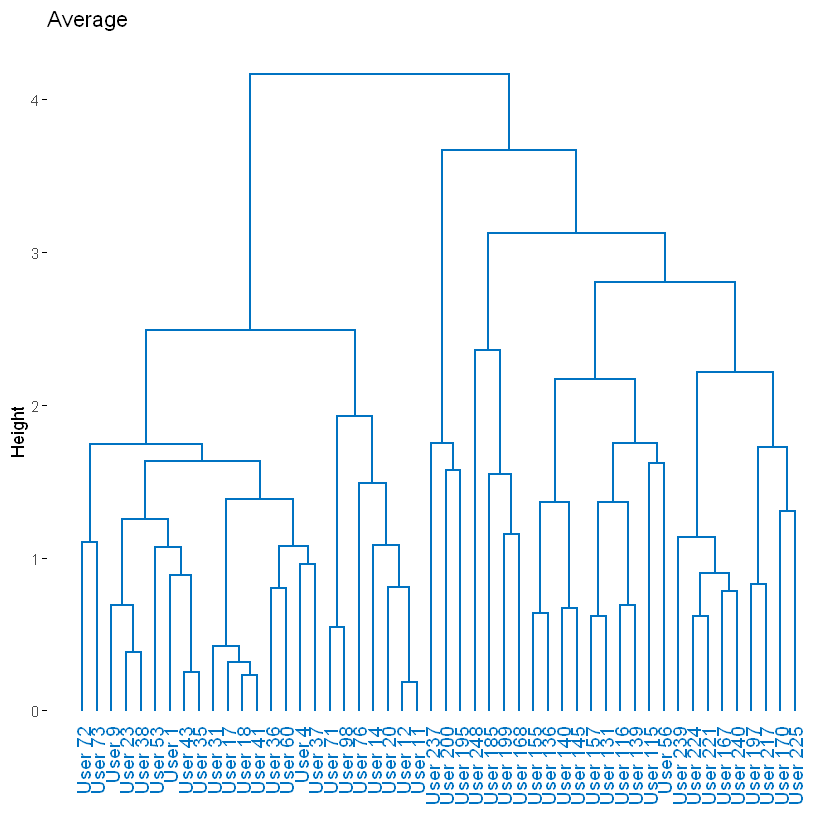

In [37]:
fviz_dend(aver_hclust, palette="jco", as.ggplot=T, main = "Average")

### Part 2.2-B

For method = Single, the two singleton clusters are:
1. User 200 User 195
2. User 224 User 221
3. User 167 User 240
4. User 157 User 131
5. User 116 User 139
6. User 155 User 136
7. User 140 User 145
8. User 197 User 217
9. User 71 User 98
10. User 12 User 11
11. User 18 User 41
12. User 36 User 60
13. User 43 User 35
14. User 23 User 38
15. User 199 User 168

For method = Complete, the two singleton clusters are:
1. User 23 User 38
2. User 43 User 35
3. User 18 User 41
4. User 36 User 60
5. User 4 User 37
6. User 12 User 11
7. User 72 User 73
8. User 155 User 136
9. User 140 User 145
10. User 71 User 98
11. User 157 User 131
12. User 116 User 139
13. User 200 User 195
14. User 197 User 217
15. User 170 User 225
16. USer 224 User 221
17. User 167 User 240
18. User 199 User 168
19. User 115 User 185

For method = Average, the two singleton clusters are:
1. User 72 User 73
2. User 23 User 38
3. User 43 User 35
4. User 18 User 41
5. User 36 User 60
6. User 4 User 37
7. User 71 User 98
8. User 12 User 11
9. User 200 User 195
10. User 199 User 168
11. User 155 User 136
12. User 140 User 145
13. User 157 User 131
14. User 116 User 139
15. User 115 User 56
16. USer 224 User 221
17. User 167 User 240
18. User 197 User 217
19. User 117 User 225

### Part 2.2-C

Method = Single produces the least two-singleton clusters (15 < 19)

### Part 2.2-D

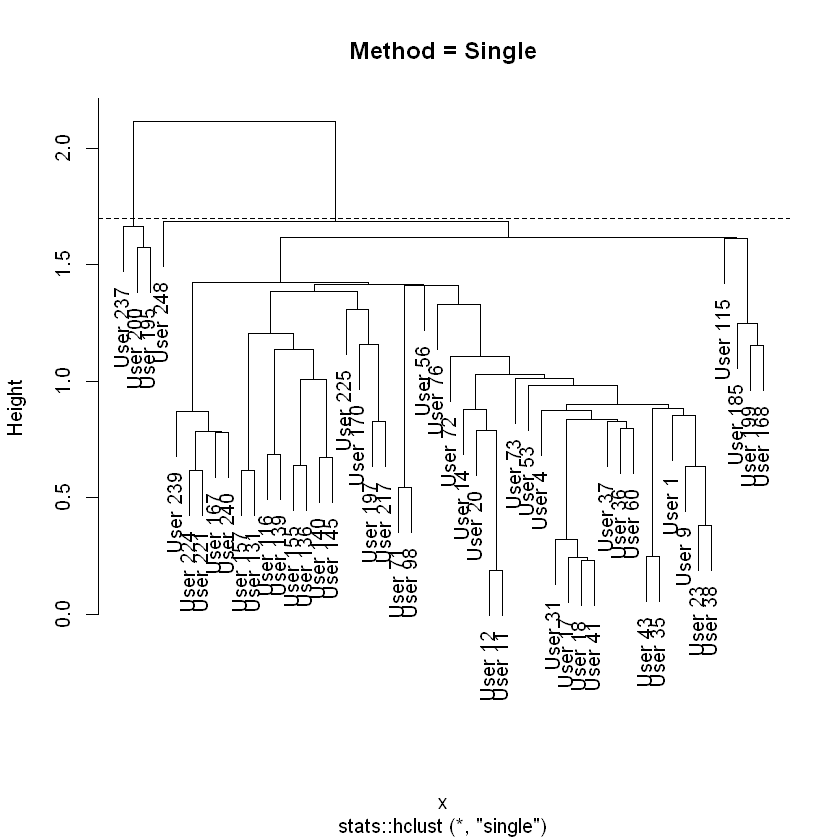

In [38]:
#x <- fviz_dend(sing_hclust, palette="jco", as.ggplot=T, main = "Single")
plot(sing_hclust, main = "Method = Single")
abline(h = 1.7, lty = 2)

2 Clusters were created

### Part 2.2-E

In [39]:
sing_hclust.2 <- eclust(data, "hclust", k = 2, hc_method="single")
comp_hclust.2 <- eclust(data, "hclust", k = 2, hc_method="complete")
aver_hclust.2 <- eclust(data, "hclust", k = 2, hc_method="average")

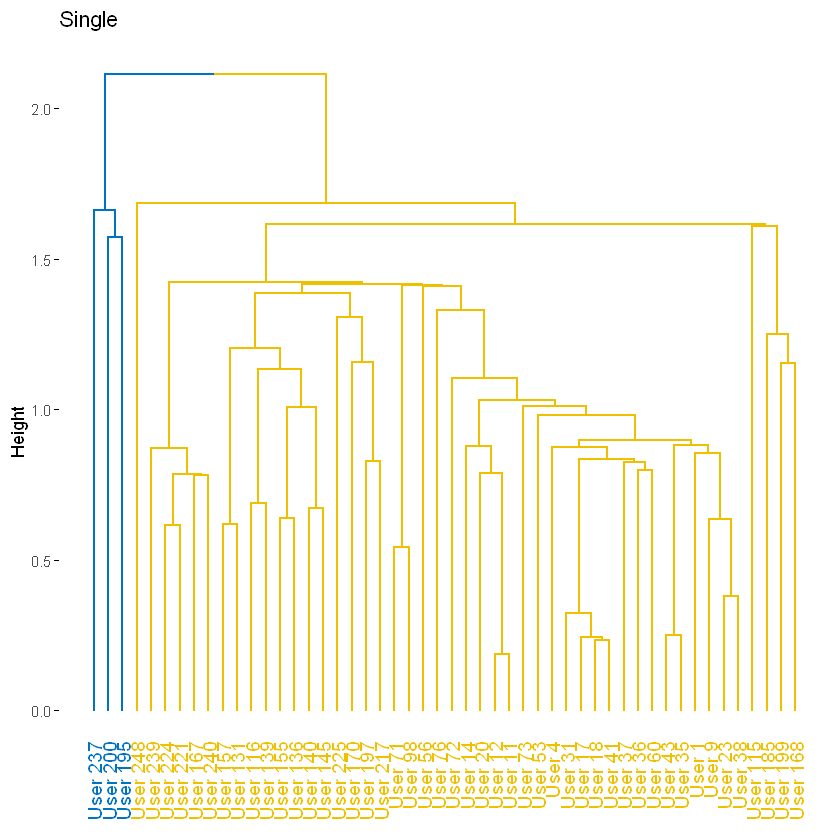

In [40]:
fviz_dend(sing_hclust.2, palette="jco", as.ggplot=T, main = "Single")

In [41]:
sing_hclust.2$silinfo$avg.width   

[1] 0.3123075

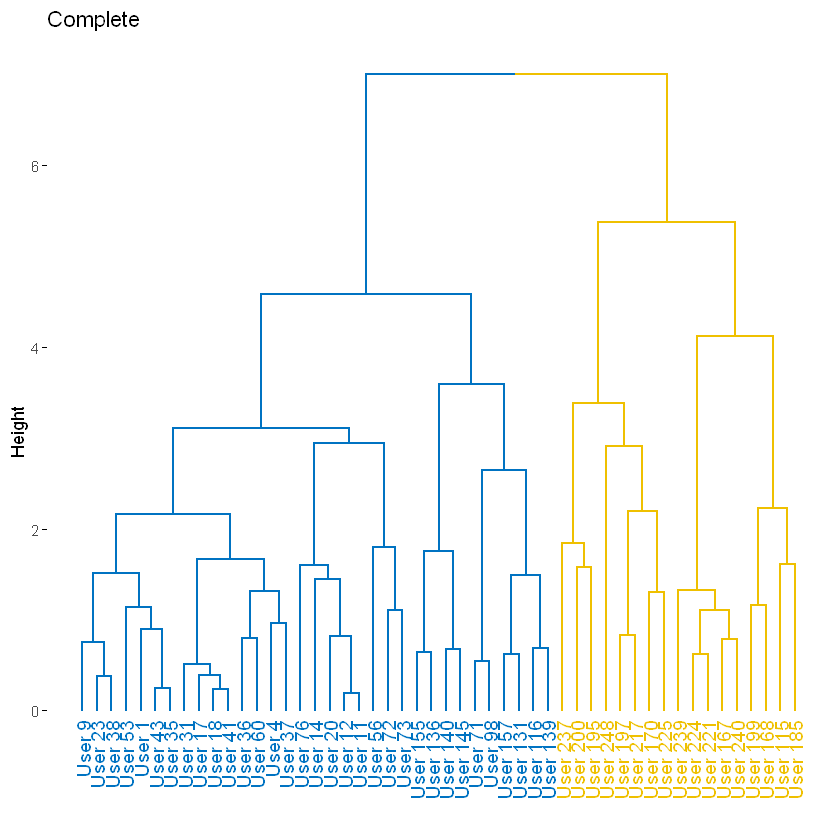

In [42]:
fviz_dend(comp_hclust.2, palette="jco", as.ggplot=T, main = "Complete")

In [43]:
comp_hclust.2$silinfo$avg.width

[1] 0.4129423

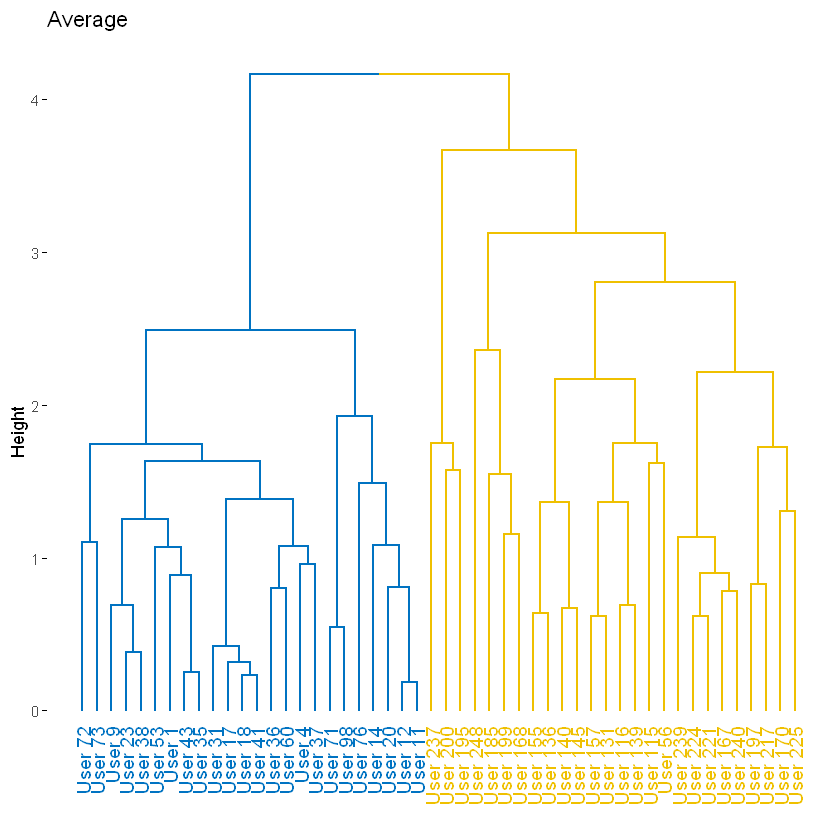

In [44]:
fviz_dend(aver_hclust.2, palette="jco", as.ggplot=T, main = "Average")

In [45]:
aver_hclust.2$silinfo$avg.width

[1] 0.4048277

In [46]:
library('NbClust')

### Part 2.2-F

Warning message in pf(beale, pp, df2):
"NaNs produced"

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


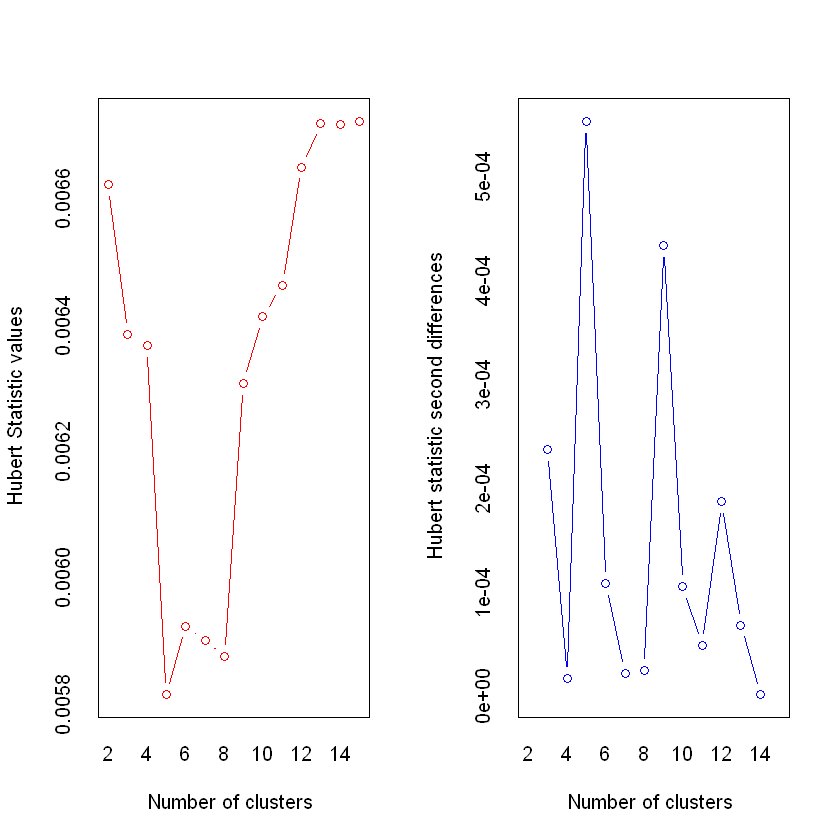

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 5 proposed 2 as the best number of clusters 
* 2 proposed 3 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 2 proposed 8 as the best number of clusters 
* 5 proposed 9 as the best number of clusters 
* 2 proposed 10 as the best number of clusters 
* 4 proposed 12 as the best number of clusters 
* 3 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
**************************

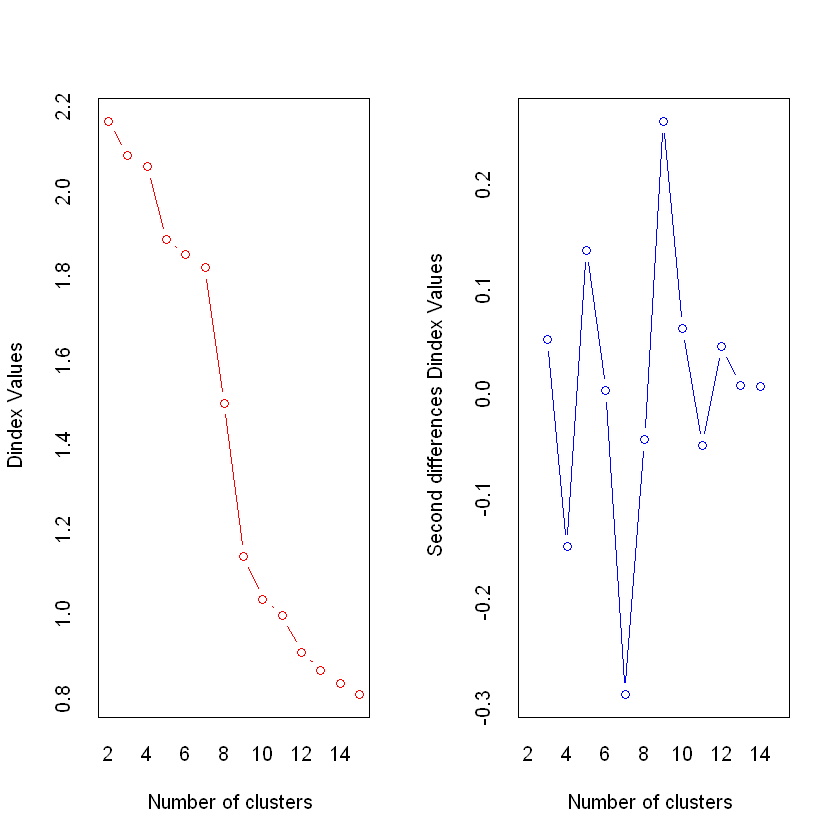

In [47]:
clust_sing <- NbClust(data, method='single')

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


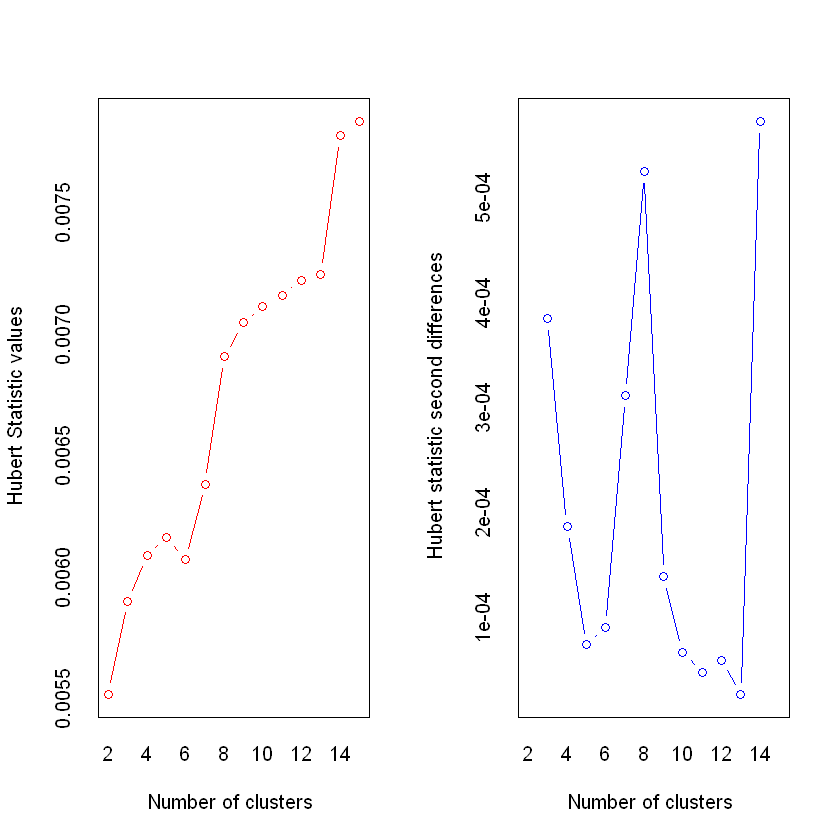

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 11 proposed 2 as the best number of clusters 
* 3 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 2 proposed 5 as the best number of clusters 
* 2 proposed 14 as the best number of clusters 
* 4 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


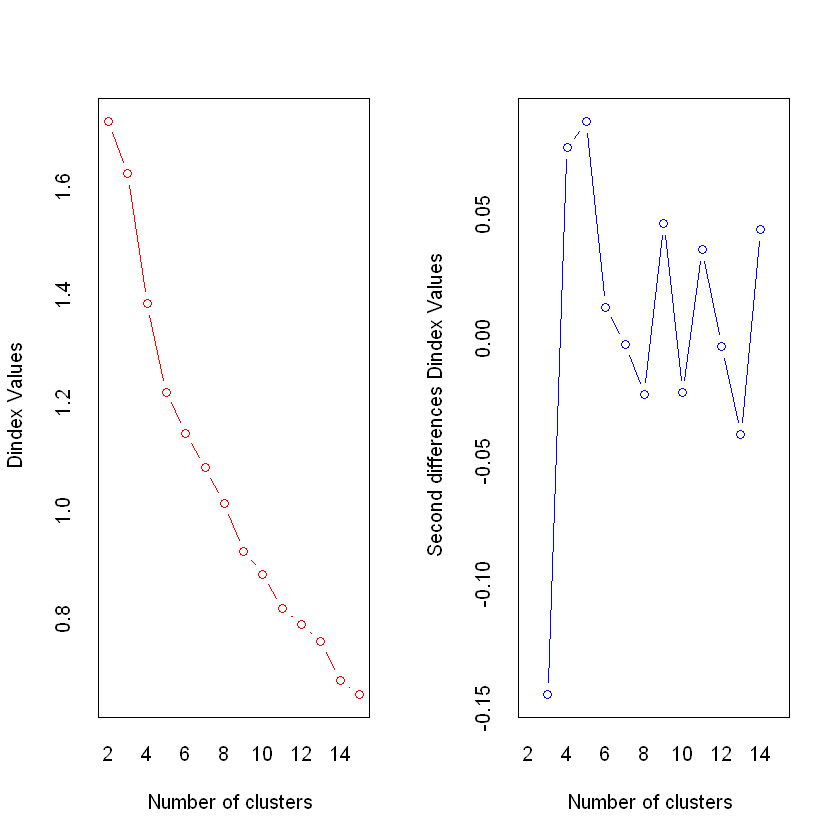

In [48]:
clust_comp <- NbClust(data, method='complete')

Warning message in pf(beale, pp, df2):
"NaNs produced"

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


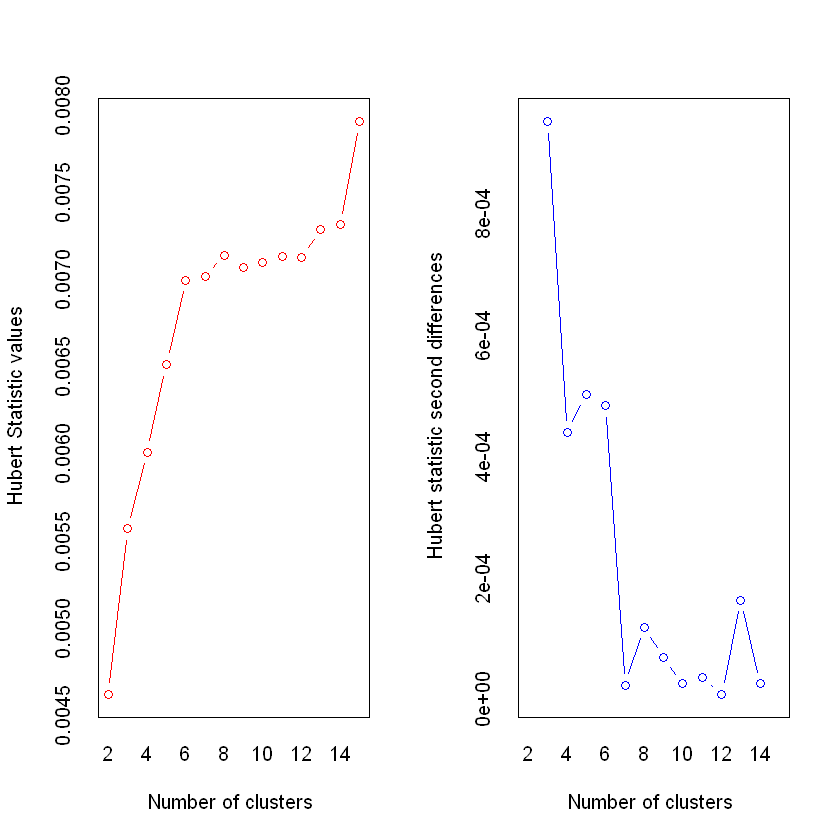

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 7 proposed 2 as the best number of clusters 
* 2 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 2 proposed 5 as the best number of clusters 
* 4 proposed 6 as the best number of clusters 
* 1 proposed 7 as the best number of clusters 
* 2 proposed 11 as the best number of clusters 
* 3 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
***************************

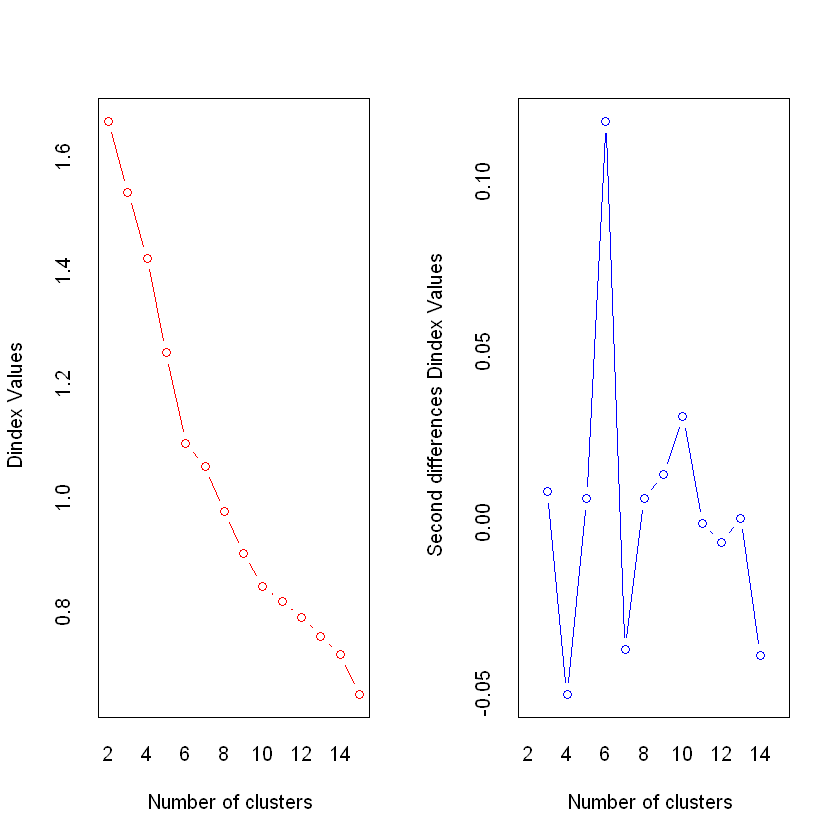

In [49]:
clust_aver <- NbClust(data, method='average')

All methods have clusters = 2 as the majority and the best number of clusters

### Part 2.2-G

In [50]:
clust_sing$All.index["2","Silhouette"]

[1] 0.3123

In [51]:
clust_comp$All.index["2","Silhouette"]

[1] 0.4129

In [52]:
clust_aver$All.index["2","Silhouette"]

[1] 0.4048

### Part 2.2-H

Higher Silhouette index implies better clusters:

Based on First strategy:

In [53]:
max(sing_hclust.2$silinfo$avg.width, comp_hclust.2$silinfo$avg.width, aver_hclust.2$silinfo$avg.width)

[1] 0.4129423

Based on Second strategy:

In [54]:
max(clust_sing$All.index["2","Silhouette"], clust_comp$All.index["2","Silhouette"],clust_aver$All.index["2","Silhouette"])

[1] 0.4129

Both point towards linkage where method = "Complete" has the highest Silhouette Index

Both strategies points towards 2 clusters which resulted in a similar Sihouette Indicies. Thus, both strategies resulted in conflicting results to my expectations from 2.1 since I predicted # of clusters = 3 to be the best division. When I initially made my expectations, I had to eye ball it through seperation and cluster optimization graphs (even though the graph pointed towards clusters = 2 in part 2.1). Doing the Silhouette Index calculations helped iron out questions I had in part 2.2. I personally think the NbClust strategy was more helpful since it showed the spread of programs that predicted other # of clusters. 

Another thing to keep in mind is the fact that this a sample of the dataset. Thus, it may have missed elements in a cluster. 

## Part 2.3

In [55]:
HTRU <- read.csv("HTRU_2-small.csv", sep = ",", header = T)
head(HTRU)

mean,std.dev,kurtosis,skewness,mean.dm.snr,std.dev.dm.snr,kurtosis.dm.snr,skewness.dm.snr,class
45.60938,39.13683,3.646904656,13.7728696,127.943144,72.76457,0.06791464,-0.826413,1
121.75781,44.74943,0.231819049,0.1846086,3.760870,22.86933,6.71857507,47.952567,0
112.97656,48.84741,0.272892611,0.2677589,94.927258,83.71522,-0.21163662,-1.861892,0
130.07031,51.38719,-0.160128253,-0.2094694,2.025084,13.17014,10.01610903,138.328787,0
111.11719,35.63500,0.237672636,1.6792307,3.688127,18.68339,6.66335683,54.090504,0
138.46094,52.77457,-0.009090614,-0.5518453,2.220736,13.20426,9.95369210,139.466872,0


In [56]:
X <- HTRU[1:8]
head(X)

mean,std.dev,kurtosis,skewness,mean.dm.snr,std.dev.dm.snr,kurtosis.dm.snr,skewness.dm.snr
45.60938,39.13683,3.646904656,13.7728696,127.943144,72.76457,0.06791464,-0.826413
121.75781,44.74943,0.231819049,0.1846086,3.760870,22.86933,6.71857507,47.952567
112.97656,48.84741,0.272892611,0.2677589,94.927258,83.71522,-0.21163662,-1.861892
130.07031,51.38719,-0.160128253,-0.2094694,2.025084,13.17014,10.01610903,138.328787
111.11719,35.63500,0.237672636,1.6792307,3.688127,18.68339,6.66335683,54.090504
138.46094,52.77457,-0.009090614,-0.5518453,2.220736,13.20426,9.95369210,139.466872


### Part 2.3-A

In [57]:
pca <- prcomp(scale(X))

#### Part 2.3-A-I

In [58]:
var <- pca$sdev^2
var_tot <- sum(var)
varPC.1.2 <- var[1] + var[2]
varPC.1.2/var_tot

[1] 0.7854804

78.54% of the variance is explained by PC1 and PC2

#### Part 2.3-A-II

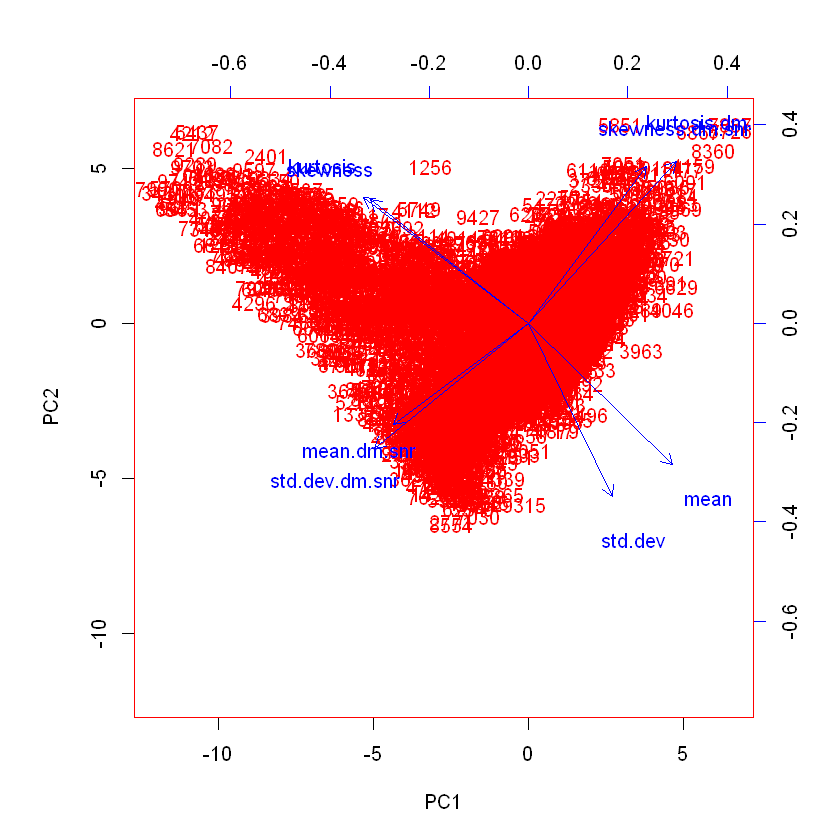

In [59]:
biplot(pca, scale=0, col = c("red","blue"))

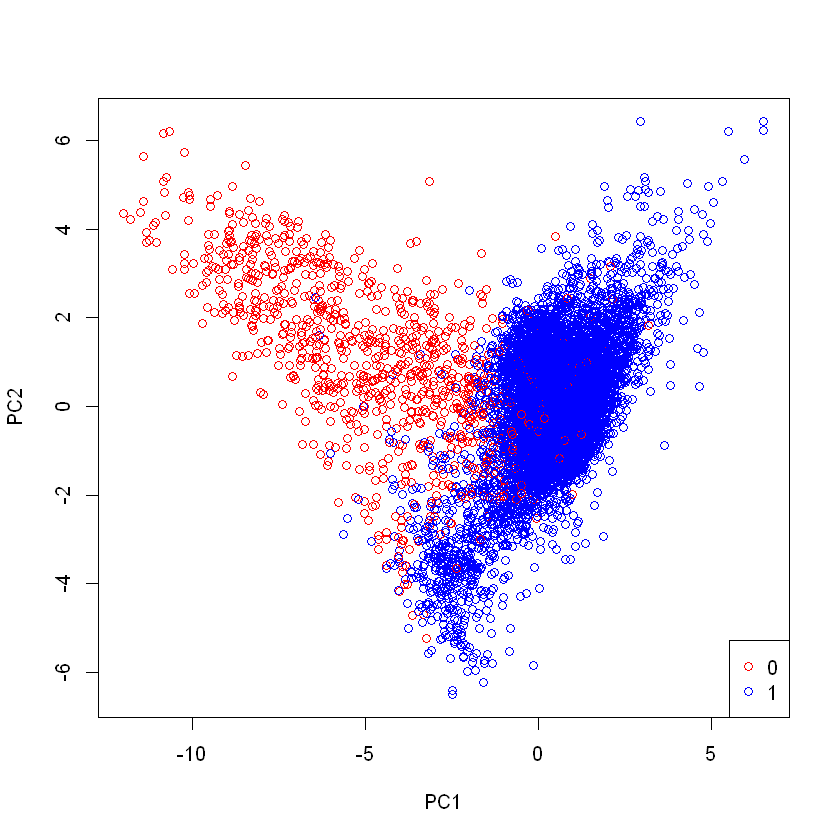

In [60]:
plot(x=pca$x[,'PC1'], y=pca$x[,'PC2'], xlab='PC1', ylab='PC2', col = c('blue','red')[as.factor(HTRU$class)])
legend(x="bottomright", legend = levels(as.factor(HTRU$class)), col=c("red","blue"), pch=1)

#### Part 2.3-A-III

Looking at both plots, it seems clear that the data is divided into classes (0 to the left and 1 to the right).

### Part 2.3-B

#### Part 2.3-B-I

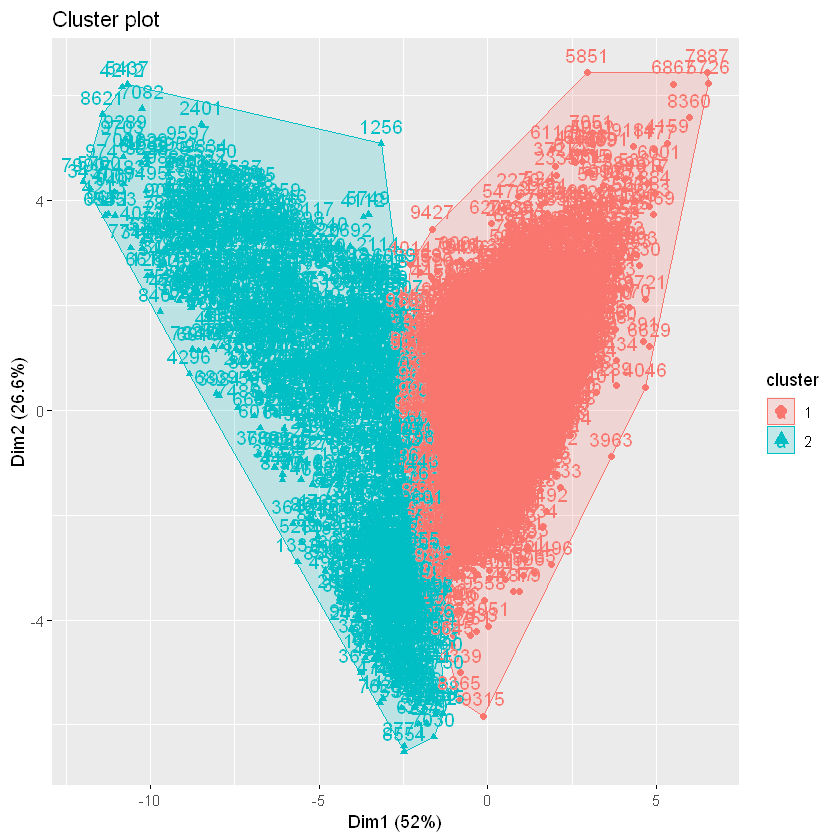

In [61]:
k <- kmeans(scale(X), centers=2, nstart=25)
fviz_cluster(k, data = scale(X))

#### Part 2.3-B-II

The shape of the graphs in a.ii and b.i are similiar with different ranges for x and y. The points in the clusters are in same positions as the pca (class labeled) plots.

Furthermore, the clusters created in b.i mimic the seperate labels in a.ii. The points in the bottom clustered differently relativing to class labels in the PCA plot.

#### Part 2.3-B-III

In [62]:
k$size

[1] 8847 1153

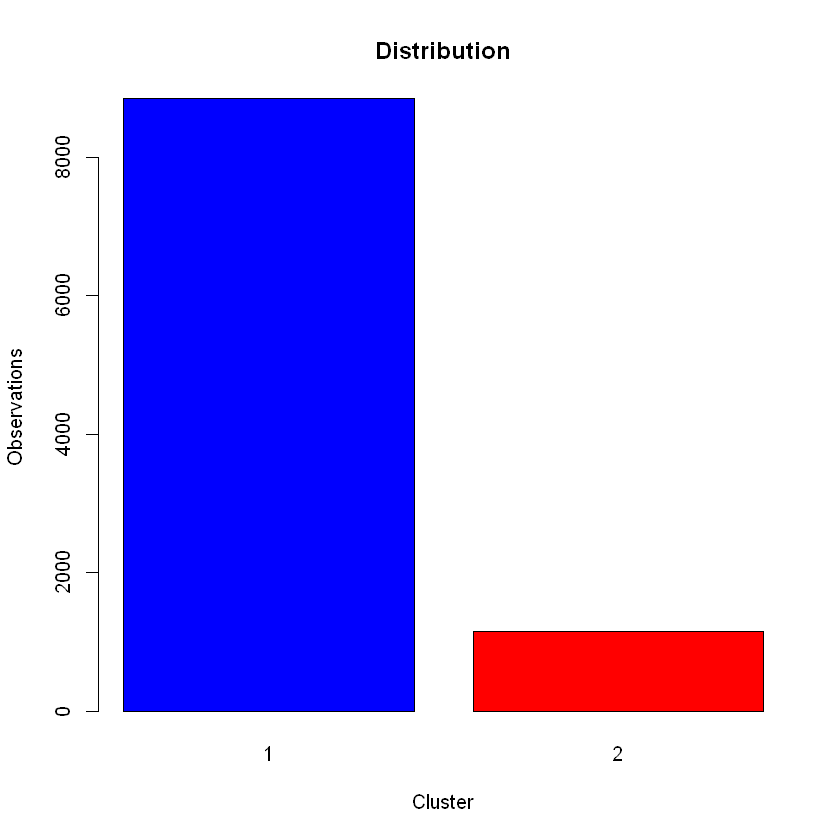

In [63]:
barplot(k$size, col = c("blue","red"), main = "Distribution", names.arg= c("1","2"),xlab="Cluster",ylab="Observations")

There are 8847 observations in cluster 1 and 1153 observations in cluster 2

#### Part 2.3-B-IV

In [64]:
nrow(HTRU[HTRU$class > 0,])

[1] 959

In [65]:
nrow(HTRU[HTRU$class < 1,])

[1] 9041

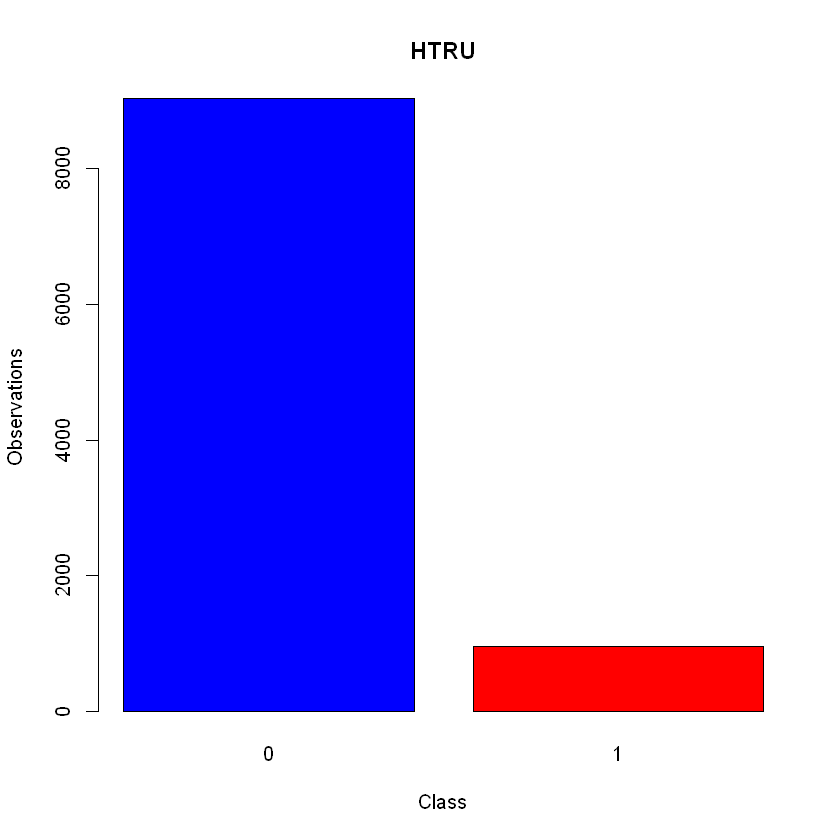

In [66]:
barplot(c(nrow(HTRU[HTRU$class < 1,]),nrow(HTRU[HTRU$class > 0,])), col = c("blue","red"), main = "HTRU", names.arg= c("0","1"),xlab="Class",ylab="Observations")

There are 9041 observations for class 0 and 959 observations for class 1

#### Part 2.3-B-V

Cluster 1 holds the majority class of class = 0 and Cluster 2 holds the minority class of class = 1

#### Part 2.3-B-VI

[1] 223

[1] 8624

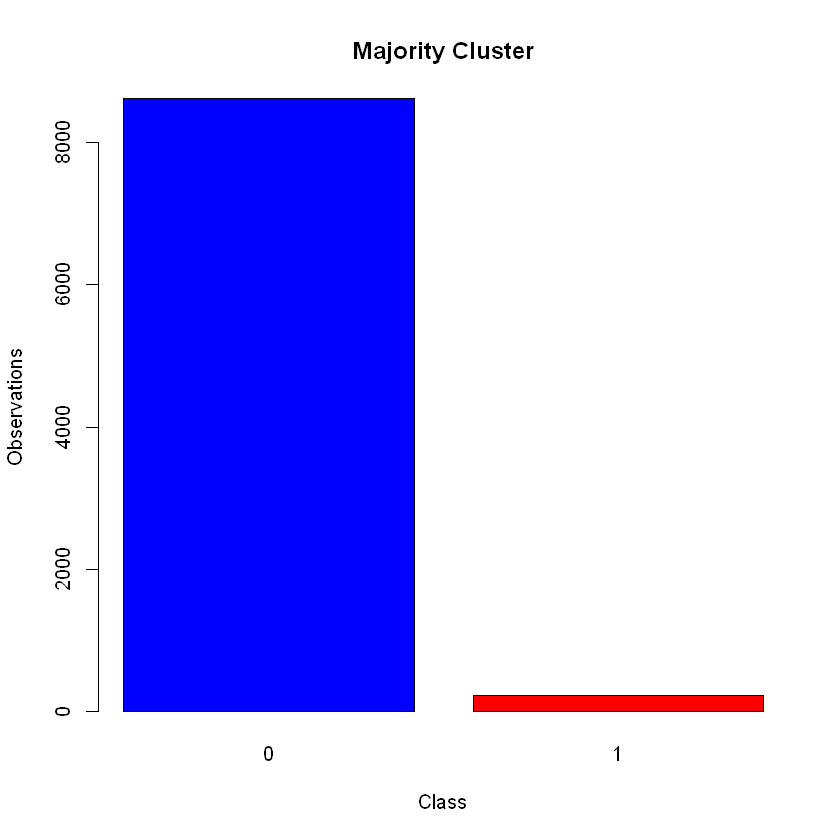

In [67]:
cluster1 <- HTRU[which(k$cluster == 1),]
nrow(cluster1[cluster1$class > 0,])
nrow(cluster1[cluster1$class < 1,])
barplot(c(nrow(cluster1[cluster1$class < 1,]),nrow(cluster1[cluster1$class > 0,])), col = c("blue","red"), main = "Majority Cluster", names.arg= c("0","1"),xlab="Class",ylab="Observations")

The majority cluster holds 223 class = 1 observations and 8624 class = 0 observations

#### Part 2.3-B-VII

Still the majority cluster holds more class = 0 obeservations so this cluster has to be class = 0

#### Part 2.3-B-VIII

In [68]:
k$betweenss/k$totss

[1] 0.3586788

35.87 % of the varriance is explained by clustering

#### Part 2.3-B-IX

In [69]:
s <- silhouette(k$cluster, dist(scale(X)))
mean(s[,'sil_width'])

[1] 0.6006794

#### Part 2.3-B-X

In [70]:
mean(s[,'sil_width'][which(k$cluster == 1)])

[1] 0.6592013

In [71]:
mean(s[,'sil_width'][which(k$cluster == 2)])

[1] 0.1516389

The Silhouette width of cluster 1 is .65920 and the Silhouette width of cluster 2 is .1516

Since the Silhouette width is being maximized to provide better clusters, cluster 1 is good relative to Silhouette width.

### Part 2.3-C

In [72]:
k <- kmeans(pca$x[, 1:2], centers=2, nstart=25)

#### Part 2.3-C-I

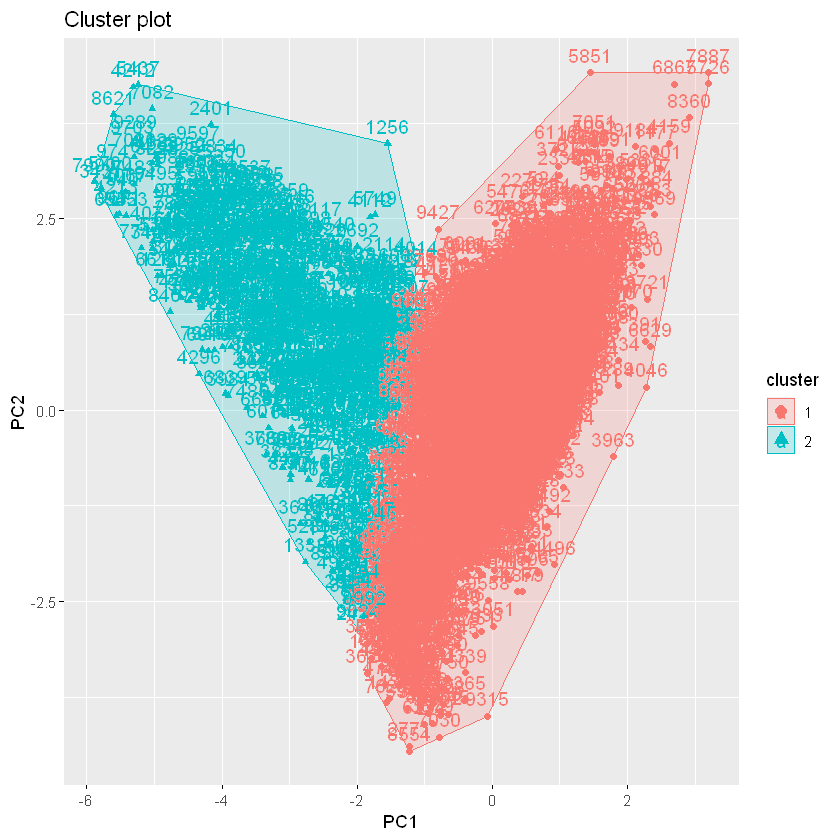

In [73]:
fviz_cluster(k, data = pca$x[, 1:2])

Once again, the shape of the overall graph are the same with different ranges on the axises. 

The differences are the clustering vs b.ii were cluster 1 have more points and spreading a little more to the left. This plot is a better representation of the plot in a.i since cluster 1 holds more of label = 1 points. There is an overestimation but looks more precise of capturing the labels than the b.ii plot.

#### Part 2.3-C-II

In [74]:
s <- silhouette(k$cluster, dist(pca$x[, 1:2]))
mean(s[,'sil_width'])

[1] 0.6826261

#### Part 2.3-C-III

In [75]:
mean(s[,'sil_width'][which(k$cluster == 1)])

[1] 0.7003259

In [76]:
mean(s[,'sil_width'][which(k$cluster == 2)])

[1] 0.4489076

The Silhouette width of cluster 1 is 0.7003 and the Silhouette width of cluster 2 is 0.4489

Since the Silhouette width is being maximized to provide better clusters, cluster 1 is good relative to Silhouette width.

#### Part 2.3-C-VI

These values seems to replicate what happened in the plots. Silhouette width Cluster 1 and Cluster 2 for b.x vs c.iii are higher in c.iii. Since we are trying to maximize Silhouette widths, c.iii are producing better clusters for 1 and 2